In [1]:
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt


In [2]:
df_main = pd.read_excel("lncRNAKB_annot.xlsx")
table_browser_refseq = pd.read_csv("table_browser_refseq.csv")
mart_export = pd.read_csv("mart_export.txt", sep=",", low_memory=False)

In [3]:
refseq_names = set(table_browser_refseq["name2"])
mart_names = set(mart_export["Gene stable ID"])

In [4]:
df_filter = df_main[(df_main["Ensembl Gene stable ID"].isin(mart_names)) | (df_main["idents"].isin(refseq_names))]

In [37]:
df_filter

,lnckbID,lnckbID.1,chr,start,end,source,gene_type,info,idents,Ensembl Gene stable ID,Gene name,Gene type,NCBI gene (formerly Entrezgene) ID,HGNC ID,strand
0,1,lnckb.1,chr1,11874,14409,"NONCODE,CHESS,LNCipedia",misc_RNA,"STATUS ""known_refseq"";description ""DEAD/H-box ...",DDX11L1,ENSG00000223972,DDX11L1,transcribed_unprocessed_pseudogene,0.0,HGNC:37102,+
1,2,lnckb.2,chr1,14362,29370,"NONCODE,CHESS,LNCipedia",misc_RNA,"STATUS ""known_refseq"";description ""WAS protein...",WASH7P,ENSG00000227232,WASH7P,unprocessed_pseudogene,0.0,HGNC:38034,-
2,3,lnckb.3,chr1,29926,31295,"NONCODE,CHESS,LNCipedia,BIGtranscriptome",lncRNA,"STATUS ""known_refseq"";gene_name ""LOC107985730""...",MIR1302-2,ENSG00000284332,MIR1302-2,miRNA,0.0,HGNC:35294,+
3,4,lnckb.4,chr1,34611,36081,"NONCODE,CHESS,LNCipedia,BIGtranscriptome",lncRNA,"STATUS ""known_refseq"";description ""family with...",FAM138A,ENSG00000237613,FAM138A,lncRNA,0.0,HGNC:32334,-
5,6,lnckb.6,chr1,69091,70008,CHESS,protein_coding,"STATUS ""known_refseq"";description ""olfactory r...",OR4F5,ENSG00000186092,OR4F5,protein_coding,79501.0,HGNC:14825,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99403,113517,lnckb.113517,chr8,110609241,110632394,BIGtranscriptome,lncRNA,"gene_id_alis ""BIG-gene-chr8-1495"";",lnckb.113517,ENSG00000253122,AC025366.1,lncRNA,0.0,0,+
99409,113523,lnckb.113523,chr9,26746953,26786874,BIGtranscriptome,lncRNA,"gene_id_alis ""BIG-gene-chr9-249"";",lnckb.113523,ENSG00000254261,AL451137.2,lncRNA,0.0,0,+
99410,113524,lnckb.113524,chr9,33719690,33722555,BIGtranscriptome,lncRNA,"gene_id_alis ""BIG-gene-chr9-329"";",lnckb.113524,ENSG00000227301,AL356489.1,lncRNA,0.0,0,+
99411,113525,lnckb.113525,chrX,138627077,138627343,BIGtranscriptome,lncRNA,"gene_id_alis ""BIG-gene-chrX-1589"";",lnckb.113525,ENSG00000232183,AL031386.1,lncRNA,0.0,0,+


In [5]:
df_filter["strand"] = "filler"

/tmp/ipykernel_343974/1521912531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["strand"] = "filler"


In [6]:
mart_export_dict = mart_export[["Gene stable ID","Strand"]].dropna().drop_duplicates(subset=['Gene stable ID']).set_index("Gene stable ID")
mart_export_dict = mart_export_dict.to_dict("index")


In [7]:
refseq_dict = table_browser_refseq[["name2","strand"]].dropna().drop_duplicates(subset=['name2']).set_index("name2")
refseq_dict = refseq_dict.to_dict("index")

In [8]:
def apply_strand(row):
    ensamlbe_id = row["Ensembl Gene stable ID"]
    indent = row["idents"]
    if ensamlbe_id in mart_export_dict:
        if mart_export_dict[ensamlbe_id]["Strand"] == 1:
            return "+"
        else:
            return "-"
    if indent in refseq_dict:
        return refseq_dict[indent]["strand"]


In [9]:
df_filter["strand"] =  df_filter.apply(apply_strand,axis=1)

/tmp/ipykernel_343974/1633899744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter["strand"] =  df_filter.apply(apply_strand,axis=1)


In [10]:
df = pd.read_csv("./Bladder_Tissue.gene.TPM.txt",sep=" ")

In [11]:
df = pd.read_csv("./Bladder_Tissue.gene.TPM.txt",sep=" ")
df = df[['chr', 'start', 'end']]

In [12]:
df = df_filter
# df = df[df["gene_type"] == "lncRNA"]
df = df[["lnckbID.1",'idents','chr', 'start', 'end',"gene_type","strand"]]

df = df.sort_values(by=['chr', 'start'])

# Rename columns to match the new format
df.columns = ["lnckbID.1",'idents', 'chr', 'start', 'end',"gene_type","strand"]

# To store results
intersected_genes = []

# Find overlapping genes
for chrom in df['chr'].unique():
    # Filter for a specific chromosome
    chrom_df = df[df['chr'] == chrom]
    chrom_df = chrom_df.reset_index(drop=True)
    
    # Iterate through the genes to find overlaps
    for i in range(len(chrom_df) - 1):
        gene1_start = chrom_df.loc[i, 'start']
        gene1_end = chrom_df.loc[i, 'end']
        gene1_name = chrom_df.loc[i, 'lnckbID.1']
        gene1_type = chrom_df.loc[i, 'gene_type']
        gene1_strand = chrom_df.loc[i, 'strand']
        
        for j in range(i + 1, len(chrom_df)):
            gene2_start = chrom_df.loc[j, 'start']
            gene2_end = chrom_df.loc[j, 'end']
            gene2_name = chrom_df.loc[j, 'lnckbID.1']
            gene2_type = chrom_df.loc[j, 'gene_type']
            gene2_strand = chrom_df.loc[j, 'strand']


            # Check for intersection
            if (
                gene1_end >= gene2_start and
                'lncRNA' in [gene1_type, gene2_type] and
                gene1_strand != gene2_strand
            ):
                intersected_genes.append((gene1_name, gene2_name))
            else:
                # No further intersections are possible beyond this point
                break

# Display results
intersected_df = pd.DataFrame(intersected_genes, columns=['lnckbID.1 1', 'lnckbID.1 2'])
print(intersected_df)
intersected_df["lnckbID.1 1"].value_counts()


      lnckbID.1 1  lnckbID.1 2
0        lnckb.32     lnckb.33
1        lnckb.36     lnckb.37
2       lnckb.128    lnckb.129
3       lnckb.138    lnckb.140
4       lnckb.165    lnckb.167
...           ...          ...
3781  lnckb.59294  lnckb.59295
3782  lnckb.59311  lnckb.59312
3783  lnckb.59325  lnckb.59326
3784  lnckb.59332  lnckb.59333
3785  lnckb.77601  lnckb.77602

[3786 rows x 2 columns]


lnckbID.1 1
lnckb.28496    7
lnckb.165      7
lnckb.30607    6
lnckb.24032    6
lnckb.10376    5
              ..
lnckb.21356    1
lnckb.21374    1
lnckb.21402    1
lnckb.21438    1
lnckb.77601    1
Name: count, Length: 3345, dtype: int64

In [13]:
intersected_df["lnckbID.1 1"].value_counts().head(10)

lnckbID.1 1
lnckb.28496    7
lnckb.165      7
lnckb.30607    6
lnckb.24032    6
lnckb.10376    5
lnckb.19087    5
lnckb.15783    5
lnckb.8256     4
lnckb.40114    4
lnckb.50427    4
Name: count, dtype: int64

In [14]:
vals = list(intersected_df["lnckbID.1 1"].value_counts().head(10).index)
df_main[df_main["lnckbID.1"].isin(vals)]

,lnckbID,lnckbID.1,chr,start,end,source,gene_type,info,idents,Ensembl Gene stable ID,Gene name,Gene type,NCBI gene (formerly Entrezgene) ID,HGNC ID
136,165,lnckb.165,chr1,2636988,2789737,"NONCODE,CHESS,LNCipedia,MITranscriptome",protein_coding,"STATUS ""known_refseq"";description ""tetratricop...",TTC34,ENSG00000215912,TTC34,protein_coding,100287898.0,HGNC:34297
6305,8256,lnckb.8256,chr11,19345200,20122928,"NONCODE,CHESS,FANTOM,LNCipedia,MITranscriptome...",protein_coding,"STATUS ""known_refseq"";description ""neuron navi...",NAV2,ENSG00000166833,NAV2,protein_coding,89797.0,HGNC:15997
7962,10376,lnckb.10376,chr11,126423493,127003460,"NONCODE,CHESS,FANTOM,LNCipedia,MITranscriptome...",protein_coding,"STATUS ""known_refseq"";description ""kin of IRRE...",KIRREL3,ENSG00000149571,KIRREL3,protein_coding,84623.0,HGNC:23204
12059,15783,lnckb.15783,chr14,67819779,68700448,"NONCODE,CHESS,LNCipedia,MITranscriptome",protein_coding,"STATUS ""known_refseq"";description ""RAD51 paral...",RAD51B,ENSG00000182185,RAD51B,protein_coding,5890.0,HGNC:9822
14661,19087,lnckb.19087,chr16,11249005,11396487,"NONCODE,CHESS,FANTOM,LNCipedia,MITranscriptome",lncRNA,"STATUS ""known_refseq"";gene_name ""LOC105371082""...",RMI2,ENSG00000175643,RMI2,protein_coding,116028.0,HGNC:28349
18575,24032,lnckb.24032,chr18,3494152,4455572,"NONCODE,CHESS,FANTOM,LNCipedia,MITranscriptome...",protein_coding,"STATUS ""known_refseq"";description ""discs large...",DLGAP1,ENSG00000170579,DLGAP1,protein_coding,9229.0,HGNC:2905
22163,28496,lnckb.28496,chr1_KI270762v1_alt,192153,352839,CHESS,protein_coding,"STATUS ""known_refseq"";description ""tetratricop...",TTC34,ENSG00000215912,TTC34,protein_coding,100287898.0,HGNC:34297
23767,30607,lnckb.30607,chr2,114442358,115845752,"CHESS,FANTOM,MITranscriptome",protein_coding,"STATUS ""known_refseq"";description ""dipeptidyl ...",DPP10,ENSG00000175497,DPP10,protein_coding,57628.0,HGNC:20823
30956,40114,lnckb.40114,chr4,28117510,28607737,"NONCODE,CHESS,FANTOM,LNCipedia,MITranscriptome...",lncRNA,"STATUS ""known_refseq"";gene_name ""LOC105374557"";",LOC105374557,NaN,NaN,NaN,NaN,NaN
38980,50427,lnckb.50427,chr7,40134887,40860767,"NONCODE,CHESS,FANTOM,LNCipedia,BIGtranscriptome",protein_coding,"STATUS ""known_refseq"";description ""succinyl-Co...",SUGCT,ENSG00000175600,SUGCT,protein_coding,79783.0,HGNC:16001


In [15]:
set1 = set(intersected_df["lnckbID.1 1"])
set2 = set(intersected_df["lnckbID.1 2"])
set3 = set1.union(set2)
list_lncRNA_names = list(set(df_filter[df_filter["gene_type"] == "lncRNA"]["lnckbID.1"]).intersection(set3))


In [16]:
len(list_lncRNA_names)

3937

In [17]:
# bladder_df = pd.read_csv("./Bladder_Tissue.gene.TPM.txt",sep=" ")
# most_significant_intersections = list(intersected_df["lnckbID.1 1"].value_counts().head(10).index)
# most_significant_intersections
# filtered_df = bladder_df.loc[most_significant_intersections]


In [18]:
directory_path = "/sci/nosnap/michall/roeizucker/jupyter_notebooks/lncRNA_hackthon"

# Dictionary to store DataFrames with filenames as keys
dataframes = {}

# Iterate over all files ending with "gene.TPM.txt" in the directory
for file_path in glob.glob(os.path.join(directory_path, "*.gene.TPM.txt")):
    # Extract the base filename without the directory or file extension
    file_name = os.path.basename(file_path).replace(".gene.TPM.txt", "")
    
    # Read the file into a DataFrame with space as the separator
    df = pd.read_csv(file_path, sep=" ")
    
    # Store the DataFrame in the dictionary with the filename as the key
    dataframes[file_name] = df

# Now you can access each DataFrame by the file's base name
# Example: accessing the DataFrame for "Adipose_Tissue"

In [19]:
for tissue in dataframes:
    print(tissue)
    df = dataframes[tissue]
    df = df[df.columns[4:]]
    print(df.mean().mean())
    print(df.loc[list(list_lncRNA_names)].mean().mean())

Testis_Tissue
10.030593309594263
10.727150729554602
Thyroid_Tissue
10.030593309594263
8.463374821015298
Bladder_Tissue
10.030593309594263
8.638033872921367
Muscle_Tissue
10.030593309594261
12.172596790344588
Uterus_Tissue
10.030593309594265
9.748413170164287
Spleen_Tissue
10.030593309594263
6.9114646454591755
Blood_Vessel_Tissue
10.030593309594265
9.696073635504133
Adipose_Tissue
10.030593309594265
7.479945923308387
Pancreas_Tissue
10.030593309594261
9.47498271250055
Prostate_Tissue
10.030593309594263
8.658431753015758
Esophagus_Tissue
10.030593309594263
6.947989946669589
Heart_Tissue
10.030593309594261
13.23174401962008
Skin_Tissue
10.030593309594261
6.432706278667427
Adrenal_Gland_Tissue
10.030593309594263
11.911227789037117
Liver_Tissue
10.030593309594261
5.809350193737421
Bone_Marrow_Tissue
10.030593309594261
6.87934573384669
Blood_Tissue
10.030593309594263
3.2047173472611417
Nerve_Tissue
10.030593309594263
8.672607823804103
Stomach_Tissue
10.030593309594263
6.786893187728781
Colon

In [20]:
tissues_list = list(dataframes.keys())
full_gene_list = list(df_main["lnckbID.1"])

In [21]:
temp_gene_set = set(full_gene_list)
for tissue in tissues_list:
    temp_gene_set = temp_gene_set.intersection(set(dataframes[tissue].index))
gene_list = sorted(list(temp_gene_set))

In [22]:
cols = dataframes["Testis_Tissue"].columns[:4]
main_dataframe = dataframes[tissues_list[0]].loc[gene_list][cols]
main_dataframe

,chr,start,end,gene_type
lnckb.1,chr1,11874,14409,misc_RNA
lnckb.10,chr1,184878,199860,misc_RNA
lnckb.100,chr1,1430157,1434573,lncRNA
lnckb.10000,chr11,112961247,113280283,protein_coding
lnckb.100000,chr10,84603029,84613397,lncRNA
...,...,...,...,...
lnckb.99995,chr10,83697523,83708684,lncRNA
lnckb.99996,chr10,83755361,83755825,lncRNA
lnckb.99997,chr10,83844924,83845245,lncRNA
lnckb.99998,chr10,84185428,84188600,lncRNA


In [23]:
for tissue in tissues_list:
    cols = list(dataframes[tissue].columns[4:])
    main_dataframe[tissue] = dataframes[tissue][cols].loc[gene_list].median(axis=1)

In [24]:
print(main_dataframe[main_dataframe.columns[4:]].mean())
print(main_dataframe[main_dataframe.columns[4:]].loc[list_lncRNA_names].mean())

Testis_Tissue             9.609925
Thyroid_Tissue            9.200009
Bladder_Tissue            9.254241
Muscle_Tissue             9.039783
Uterus_Tissue             9.304974
Spleen_Tissue             9.181893
Blood_Vessel_Tissue       9.081713
Adipose_Tissue            8.956524
Pancreas_Tissue           9.125605
Prostate_Tissue           8.973288
Esophagus_Tissue          7.698324
Heart_Tissue              8.197507
Skin_Tissue               8.617713
Adrenal_Gland_Tissue      9.345530
Liver_Tissue              8.750867
Bone_Marrow_Tissue        9.988030
Blood_Tissue              8.494379
Nerve_Tissue              9.457133
Stomach_Tissue            8.512882
Colon_Tissue              8.745300
Vagina_Tissue             8.868829
Breast_Tissue             8.954110
Kidney_Tissue             8.752375
Lung_Tissue               8.901166
Pituitary_Tissue          8.989047
Salivary_Gland_Tissue     8.185618
Brain_Tissue              8.576711
Cervix_Uteri_Tissue       8.786806
Ovary_Tissue        

In [25]:
main_dataframe.to_csv("median_TPM_per_gene.csv")

In [26]:
temp_df = main_dataframe[main_dataframe.columns[4:]].loc[list_lncRNA_names].var(axis=1)
max_val = temp_df.argmax()
temp_df.index[max_val]

'lnckb.15058'

In [27]:
temp_df = main_dataframe[main_dataframe.columns[4:]].var(axis=1)
max_val = temp_df.argmax()
temp_df.index[max_val]

'lnckb.18652'

In [28]:
def find_corr(row):
    gene_1 = row["lnckbID.1 1"]
    gene_2 = row["lnckbID.1 2"]
    
    return main_dataframe.loc[[gene_1,gene_2]][main_dataframe.columns[4:]].T.corr().loc[gene_1,gene_2]
intersected_df["corr"] = intersected_df.apply(find_corr,axis=1)

In [29]:
intersected_df.to_csv("intersected_with_corr.csv")

In [40]:
intersected_df.sort_values(by="corr").head(30)

,lnckbID.1 1,lnckbID.1 2,corr
3018,lnckb.47970,lnckb.47972,-0.368889
1223,lnckb.19313,lnckb.19314,-0.292921
3751,lnckb.58660,lnckb.58661,-0.256743
2855,lnckb.45322,lnckb.45324,-0.246791
135,lnckb.2300,lnckb.2303,-0.242406
921,lnckb.14534,lnckb.14536,-0.236377
1222,lnckb.19301,lnckb.19303,-0.234364
338,lnckb.5812,lnckb.5813,-0.222736
1505,lnckb.24276,lnckb.24277,-0.221276
3635,lnckb.56517,lnckb.56518,-0.220868


<module 'matplotlib.pyplot' from '/sci/nosnap/michall/roeizucker/new_python_env/lib/python3.11/site-packages/matplotlib/pyplot.py'>

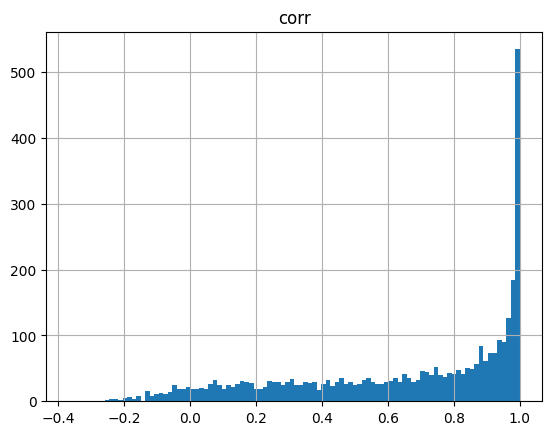

In [31]:
intersected_df.hist(bins=100)
plt

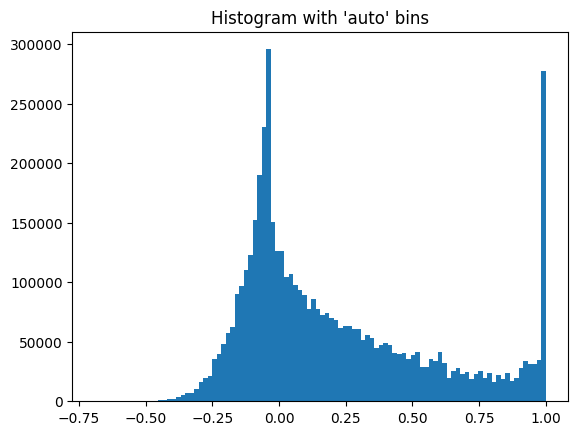

In [33]:
mat = np.array(main_dataframe.sample(3000)[main_dataframe.columns[4:]].T.corr())
n = mat.shape[0]
mat[range(n), range(n)] = None
x = mat.ravel()
x = x[~np.isnan(x)]
plt.hist(x, bins=100)  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

In [34]:
main_dataframe

,chr,start,end,gene_type,Testis_Tissue,Thyroid_Tissue,Bladder_Tissue,Muscle_Tissue,Uterus_Tissue,Spleen_Tissue,...,Vagina_Tissue,Breast_Tissue,Kidney_Tissue,Lung_Tissue,Pituitary_Tissue,Salivary_Gland_Tissue,Brain_Tissue,Cervix_Uteri_Tissue,Ovary_Tissue,Small_Intestine_Tissue
lnckb.1,chr1,11874,14409,misc_RNA,1.297840,0.130809,0.171163,0.000000,0.000000,0.151513,...,0.000000,0.000000,0.000000,0.000000,0.141384,0.000000,0.134018,0.000000,0.152539,0.130601
lnckb.10,chr1,184878,199860,misc_RNA,18.714087,20.043713,15.554753,5.731136,17.062595,16.056818,...,13.585713,13.205201,15.070251,12.960159,16.294982,13.668770,12.057350,12.159150,17.297722,16.190044
lnckb.100,chr1,1430157,1434573,lncRNA,9.867167,2.640742,23.181137,0.448869,13.470364,2.072051,...,6.601906,9.721462,5.210452,5.254315,2.587352,13.042478,12.217492,8.496433,3.883865,3.983243
lnckb.10000,chr11,112961247,113280283,protein_coding,0.872381,3.985779,8.695843,0.810679,12.162824,0.400516,...,3.558350,0.367534,0.192925,0.246073,3.385496,0.393089,17.507269,4.939413,6.377115,1.228694
lnckb.100000,chr10,84603029,84613397,lncRNA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lnckb.99995,chr10,83697523,83708684,lncRNA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lnckb.99996,chr10,83755361,83755825,lncRNA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lnckb.99997,chr10,83844924,83845245,lncRNA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
lnckb.99998,chr10,84185428,84188600,lncRNA,0.000000,0.000000,1.510054,0.000000,0.000000,0.000000,...,2.512735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.952162
